In [1]:
import sys
import sys
import os
ROOT  = "../"
# Add current working directory to sys.path
sys.path.append(ROOT)
sys.path.append("/home/mehdii/projects/def-vidalthi/mehdii/3DPU_Plateau_Problem/")
from PointList import *
%matplotlib widget 
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from tqdm import tqdm
import math
from _3DLoops._3dpu_using_dfs import *
from Block_edges.block_edges import *

In [2]:
import pickle

# Specify the file path
file_path = "/home/mehdii/projects/def-vidalthi/mehdii/3DPU_Plateau_Problem/Results/ph_loops.pkl"

# Load the pickle file
with open(file_path, "rb") as file:
    C = pickle.load(file)

In [3]:
def transform_euclidean(point):
    i,j,k = point[0], point[1], point[2]
    axe = point[3]
    if axe == 0:
        return [i,j+0.5,k+0.5]
    if axe == 1:
        return [i+0.5,j,k+0.5]
    if axe == 2:
        return [i+0.5,j+0.5,k]
    

In [4]:
Closed_paths = C.cycles
Polygones = []
for path in Closed_paths:
    polygone = PointList()
    for i in path[:-1]:
        polygone.add_point(transform_euclidean(C.mapping[i]))
    Polygones.append(polygone)

In [5]:
Lenghts = [len(polygone.points) for polygone in Polygones]
Lengths = np.array(Lenghts)
indice = np.argmax(Lengths)
Lenghts[indice]

2164

In [12]:
polygone = Polygones[indice]
M = Edge_Flipping(polygone,100000)
M.create_quadrilaterals()
M.split_quadrilateral()
M.canonic_representation_from_mesh()
M.update_weights()

s is 22


100%|██████████| 47609/47609 [04:10<00:00, 189.77it/s] 


In [13]:
M.update_weights()
for i in tqdm(M.inside_indexes):
    M.update_mapping(i)

100%|██████████| 47609/47609 [01:04<00:00, 733.50it/s] 


In [23]:
List_M = []
for polygone in tqdm(Polygones[2164:2165]):
    print(len(polygone.points))
    if len(polygone.points) < 6:
        Nbre = len(polygone.points)
        N = 0
    else:
        Nbre = 10*len(polygone.points)
        N = 3
    M = Edge_Flipping(polygone,Nbre)
    M.create_quadrilaterals()
    M.split_quadrilateral()
    M.canonic_representation_from_mesh()
    M.add_points_to_boundary(N)
    M.update_weights()
    area = M.calculate_area()
    for i in (M.inside_indexes):
        M.update_mapping(i)
    D = M.lawson_flip()
    new_area = M.calculate_area()

    while area - new_area > 0.01:
        curvature = M.compute_mean_curvature()
        area = M.calculate_area()
        M.update_weights()
        for i in (M.inside_indexes):
            M.update_mapping(i)
        M.lawson_flip()
        E = Block_edges(M.triangles,M.mapping)
        E.block_all_the_edges()
        print(area,curvature,len(E.blocked_edges))
        new_area = M.calculate_area()
    print(M.compute_mean_curvature())
    List_M.append(M)
    


100%|██████████| 1/1 [00:00<00:00, 11.95it/s]

14
6.749695328383141


In [10]:
M.


504

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (25969,) + inhomogeneous part.

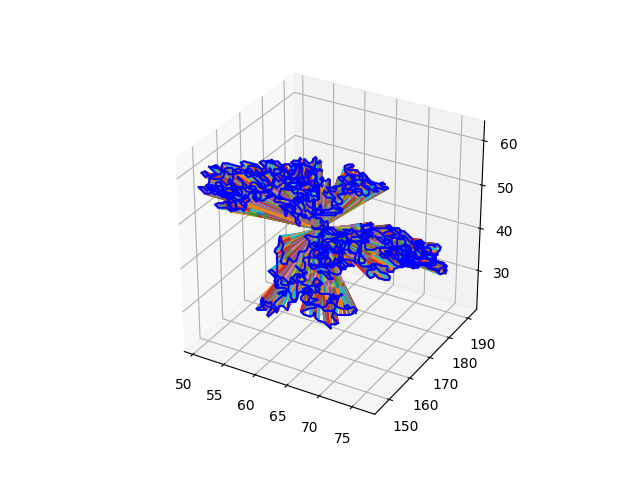

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')
X = []
Y = []
Z = []
J = M
for tr in J.triangles:
    xs = [J.mapping[ind][0] for ind in tr] + [J.mapping[tr[0]][0]]
    ys = [J.mapping[ind][1] for ind in tr] + [J.mapping[tr[0]][1]]
    zs = [J.mapping[ind][2] for ind in tr] + [J.mapping[tr[0]][2]]
    ax.plot(xs,ys,zs)
    
    X = X + list(xs)
    Y = Y + list(ys)
    Z = Z + list(zs)

# for edge in edges_m:
#     x = [edge[0][0], edge[1][0]]
#     y = [edge[0][1], edge[1][1]]
#     z = [edge[0][2], edge[1][2]]
#     ax.plot(x, y, z, color ="black")

x,y,z = [],[],[]
for k in J.boundary.points:
    L =  k
    x.append(L[0])
    y.append(L[1])
    z.append(L[2])

#Drawing the blocked edges
X_e,Y_e,Z_e = [],[],[]
# for (P,Q) in C.blocked_edges:
#     plt.plot([P[0],Q[0]],[P[1],Q[1]],[P[2],Q[2]],color = "black")

plt.plot(x+[x[0]],y+[y[0]],z+[z[0]],color='blue') 

X.append(x)
Y.append(y)
Z.append(z)
X = np.array(X)
Y = np.array(Y)
Z = np.array(Z)
max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max() / 2.0 

mid_x = (X.max()+X.min()) * 0.5
mid_y = (Y.max()+Y.min()) * 0.5
mid_z = (Z.max()+Z.min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)


In [11]:

for i in (M.inside_indexes):
    M.update_mapping(i)
D = M.lawson_flip()
new_area = M.calculate_area()
curvature = M.compute_mean_curvature()
while  curvature > 1:

    area = M.calculate_area()
    print(area,curvature)
    curvature = M.compute_mean_curvature()
    M.update_weights()
    for i in (M.inside_indexes):
        M.update_mapping(i)
    M.lawson_flip()


100.205397608552 6.091363474548098
100.11346875851171 6.091363474548098
100.41688815035839 5.97363301688231
100.44475975583237 6.693837626554478
101.10337485261618 6.850386896577944
101.20042706097966 10.525408990529037
102.27941051791154 16.52449199690867
102.45489853700647 9.5908857810567
103.81638062274209 9.007815241078271
103.90104994360674 7.9441296216707995
105.5095372604204 7.3882207688313635
105.41057158630969 10.34426598154806
107.13416271591188 6.8487028374290535
107.07408485884554 9.512612584124547
108.51520866604618 6.920536065869582
107.91426438132154 9.046890697842818
109.37058459306037 7.272390313126699
108.642180442182 8.346068192886293
110.00190459152925 7.345248340684016
109.2181998467482 8.096713236889894
110.6520328848934 9.729891531985713
109.55570539662978 7.711315542494319
111.15139351801298 8.70916377880727
109.99438312968415 7.258306171707915
111.57523979694719 7.747679526407189
110.18973277363988 7.510339668773369
111.64118536953126 7.405163108808334
110.0042

KeyboardInterrupt: 

In [17]:
C = Block_edges(M.triangles,M.mapping)
C.block_all_the_edges()

In [18]:
len(C.blocked_edges)

121